<a href="https://colab.research.google.com/github/callecristina/callecristina/blob/main/random_forest_and_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga de los datos

In [295]:
import csv #metodo 1
import pandas as pd
df=pd.read_csv("Tabla_1.csv", sep=",")
df.head()


,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,9691.276227,464.157260,21484.678945,15838.706634,10074.683942,216.603308,6.529,False
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,35052.144316,33433.615110,23406.818748,10586.568174,18348.012177,214.744111,7.931,False
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,13763.521756,33784.341040,26138.012756,21585.291347,1582.360568,223.806053,5.667,False
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,7446.306499,2438.613334,5175.440486,10227.979090,8692.253401,217.083989,6.925,False
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,2679.329519,9565.582845,23651.312194,12981.884477,10443.878610,129.984548,6.617,False


In [296]:
#Selecionar las variables relevantes
df=df.iloc[:,1:]
df=df.drop(["Dept", "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], axis=1)
df.head()

,Store,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,5,16/09/2011,564312.734549,False,32.687061,3.526,216.603308,6.529,False
1,21,24/06/2011,169199.146654,False,59.608361,3.594,214.744111,7.931,False
2,9,27/01/2012,76445.807545,False,16.623822,3.290,223.806053,5.667,False
3,6,05/08/2011,529384.632399,False,36.466380,3.684,217.083989,6.925,False
4,17,23/12/2011,590421.125970,False,92.396503,3.186,129.984548,6.617,False


Descripción de los datos. Se ven que que son 50 observaciones y que la base de datos esta completa

In [297]:
df.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,23.000000,311881.166051,53.860291,3.410660,170.399624,7.786860
std,12.748749,200149.261403,32.810056,0.379839,39.681079,1.985656
min,3.000000,11877.665598,-0.149522,2.720000,126.208548,4.145000
25%,11.000000,154829.287341,27.754418,3.142000,132.856661,6.628750
50%,23.000000,244411.544868,53.154975,3.434500,141.409535,7.520500
75%,34.000000,500367.379137,84.572924,3.672500,210.714492,8.799500
max,45.000000,682722.852234,99.921138,4.110000,225.453758,14.021000


Cuantas veces se repite cada tienda

In [ ]:
print(df.groupby('Store').size())

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


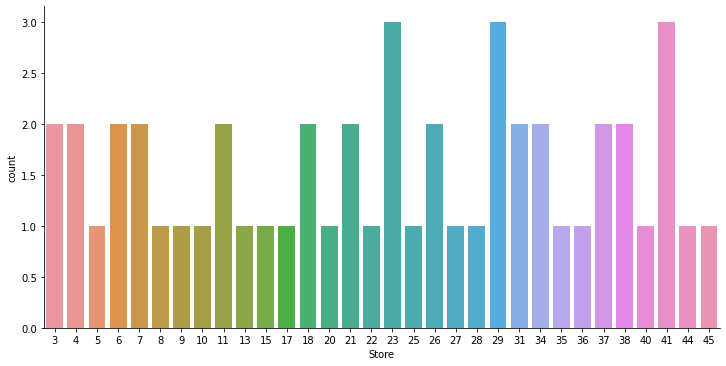

In [298]:
#Se grafica la frencuencia de cada tienda
import seaborn as sb
sb.factorplot('Store',data=df,kind="count", aspect=2)

El histograma de las variables relevantes

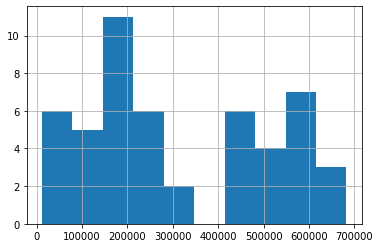

In [299]:
df.Weekly_Sales.hist()

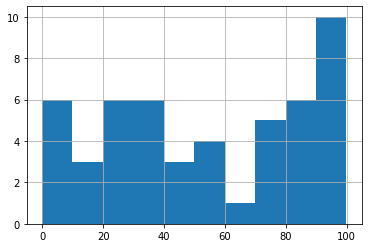

In [300]:
df.Temperature.hist()

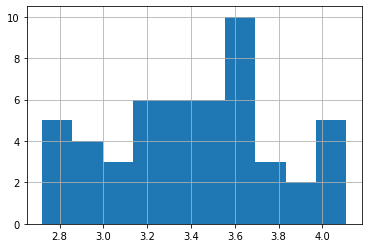

In [301]:
df.Fuel_Price.hist()

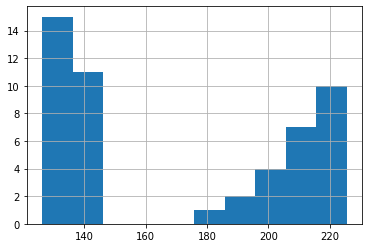

In [302]:
df.CPI.hist()

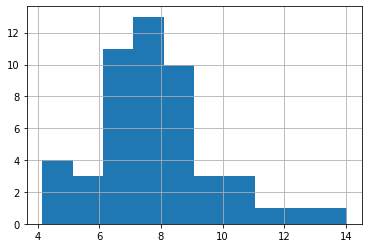

In [303]:
df.Unemployment.hist()

K-Nearest Neighbor

Instalación del paquete

In [304]:
pip install sklearn

importación de sklear

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


La división de los datos

In [392]:
x=df.iloc[:,3:]
x=pd.concat([df.Store,x],axis=1)
x
#Lo anterior crea data frame con las caracteristicas

,Store,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,5,False,32.687061,3.526,216.603308,6.529,False
1,21,False,59.608361,3.594,214.744111,7.931,False
2,9,False,16.623822,3.290,223.806053,5.667,False
3,6,False,36.466380,3.684,217.083989,6.925,False
4,17,False,92.396503,3.186,129.984548,6.617,False
5,31,False,43.412585,3.620,221.808352,6.565,False
6,21,False,52.963927,2.720,210.873332,8.324,False
7,4,False,74.145519,3.371,129.606067,5.644,False
8,20,False,26.041172,3.141,204.637673,7.484,False
9,22,False,28.162576,4.034,138.678283,8.252,False


In [308]:
x=x.values #se convierte en un array
y=df["Weekly_Sales"].values #las ventas semanales como la variable objetivo
#Esto divide las 50 observaciones en 35 (70%) de entrenamiento, y 15 (30%) de testeo
xEntreno, xTest, yEntreno, yTest = train_test_split(x, y, test_size=0.3, random_state=0,shuffle=True)


In [388]:
escala = MinMaxScaler()
print(escala)
#esto crea un rango entre 0 y en el que se puedan normalizar las caracteristicas

MinMaxScaler(copy=True, feature_range=(0, 1))


Esto transforma en las caracteristicas en escalas que van de cero a uno, para su normalización

In [389]:
xEntreno = escala.fit_transform(xEntreno)
xTest=escala.transform(xTest)

Aplicación del KNN

Se toma a priori como paramatreo los tres vecinos más cercanos

In [394]:
nvecinos=3
KNN = KNeighborsRegressor(n_neighbors=nvecinos)
KNN.fit(xEntreno,yEntreno)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Predicción con los datos de entrenamiento

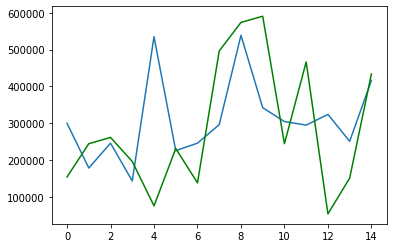

In [395]:
import matplotlib.pyplot as plt
p11 = KNN.predict(xTest) #predicción
plt.plot(p11)
plt.plot(yTest, color="green")

La anterior grafica muestra los valores prdichos en azul vrs los valores observados en verde

Determinar el error

In [398]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#promedio del error al cuadrado
cem1=mean_squared_error(yTest,p11)
#raiz
rcem1=sqrt(cem1)
rcem1

176797.80579124912

raiz  del error al cuadrado medio es 176797.80579124912

Determinar el número de vecinos optimos, con un ajuste de 1 a 20 vecinos

In [401]:
 parametros = {"n_neighbors": range(1, 20)}
 gr= GridSearchCV(KNeighborsRegressor(), parametros)
 gr.fit(xEntreno, yEntreno)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [402]:
gr.best_params_

{'n_neighbors': 16}

El mejor paramentro es 16 vecinos

In [348]:
nvecinos=16
KNN2 = KNeighborsRegressor(n_neighbors=nvecinos)
KNN2.fit(xEntreno,yEntreno)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')

Las predicciones con los datos de entrenamiento

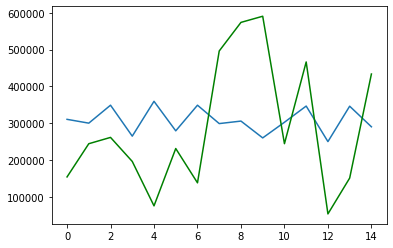

In [403]:
p12 = KNN2.predict(xTest) #predicción
plt.plot(p12)
plt.plot(yTest, color="green")

La anterior grafica muestra los valores prdichos en azul vrs los valores observados en verde

In [404]:
#promedio del error cuadrado
cem2=mean_squared_error(yTest,p12)
#raiz
rcem2=sqrt(cem2)
rcem2

182620.7316868306

raiz cuadrada del error medio 182620.7316868306. Como se ve el error en vez de disminuir aumento, esto se debe a que el número de vecinos es grande para el 70% de los datos

Se repite el proceso con de 1 a 10 vecinos

In [405]:
 parametros = {"n_neighbors": range(1, 10)}
 gr= GridSearchCV(KNeighborsRegressor(), parametros)
 gr.fit(xEntreno, yEntreno)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [406]:
gr.best_params_

{'n_neighbors': 9}

En este caso el parametro de vecinos es 9

In [407]:
nvecinos=9
KNN3 = KNeighborsRegressor(n_neighbors=nvecinos)
KNN3.fit(xEntreno,yEntreno)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

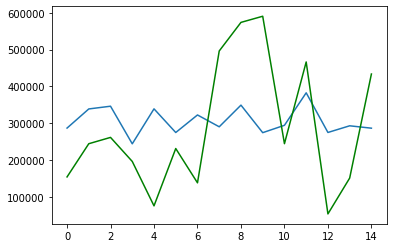

In [410]:
p13 = KNN3.predict(xTest) #predicción
plt.plot(p13)
plt.plot(yTest, color="green")

Como se ve la predicción un poco ajusta mejor, el azul son los valores predichos, mientras los verdes son los observados

In [411]:
#promedio del error cuadrado
cem3=mean_squared_error(yTest,p13)
#raiz
rcem3=sqrt(cem3)
rcem3

169838.7148244125

Además la raiz cuadrada del error se reduce un poco

Randon Forest

In [419]:
#se hace la importación necesaria
from sklearn.ensemble import RandomForestRegressor
#se establecen los parametros del modelo. Se estima 100 arboles donde el criterio es el error medio al cuadrado, y no se limita el largo del arbol
RDF = RandomForestRegressor(n_estimators=100, criterion="mse", bootstrap = True, verbose=2,max_features = 'sqrt', random_state=0)
RDF.fit(xEntreno, yEntreno)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


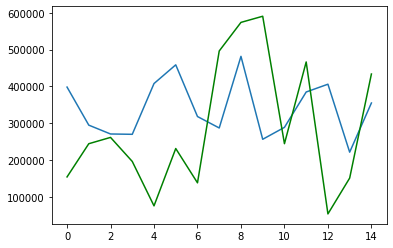

In [413]:
#predicción
p21=RDF.predict(xTest)
plt.plot(p21)
plt.plot(yTest, color="green")

la línea azul es la de los valores predichos, mientras que la verdes representa los observados los observados

In [431]:
#promedio del erro cuadrado
cem4=mean_squared_error(yTest,p21)
#raiz
rcem4=sqrt(cem4)
rcem4

194521.9777874769

In [421]:
#se importa la función necesaria para exportar el árbol
from sklearn.tree import export_graphviz
import pydot
arbol = RDF.estimators_[6] #se crea el arbol com seis estimadores
arbol

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=192771779, splitter='best')

In [422]:
#se crea el arbol.dot y luego se convierte en un png
export_graphviz(arbol, out_file = 'arbol.dot',rounded = True, precision = 1)
(grafica, ) = pydot.graph_from_dot_file('arbol.dot')
grafica.write_png('arbol.png')

In [423]:
#Se repite la estimación pero esta vez limitando la extensión a 3 niveles max_depth=3
RDF2 = RandomForestRegressor(n_estimators=100, criterion="mse", bootstrap = True, verbose=2,max_features = 'sqrt', random_state=0,max_depth=3)
RDF2.fit(xEntreno,yEntreno)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

In [424]:
arbol2 = RDF2.estimators_[6]
arbol2 #se crea un segundo arbol

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=192771779, splitter='best')

In [372]:
#Se exporta en un archivo. dot
export_graphviz(arbol2, out_file = 'arbol2.dot', rounded = True, precision = 1)

In [373]:
(grafica, ) = pydot.graph_from_dot_file('arbol2.dot') #luego se transporma en png
grafica.write_png('arbol2.png')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


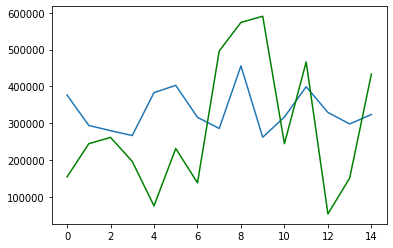

In [425]:
#predicción
p22=RDF2.predict(xTest)
plt.plot(p22)
plt.plot(yTest, color="green")

In [426]:
#promedio del error cuadrado
cem5=mean_squared_error(yTest,p22)
#raiz
rcem5=sqrt(cem5)
rcem5

181973.58363507036

In [376]:
#Se vuelve a estimar el ramdon forest pero s estiman 1000 arboles 
RDF3 = RandomForestRegressor(n_estimators=1000, criterion="mse", bootstrap = True, verbose=2,max_features = 'sqrt', random_state=0,max_depth=3)

In [ ]:
RDF3.fit(xEntreno,yEntreno)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


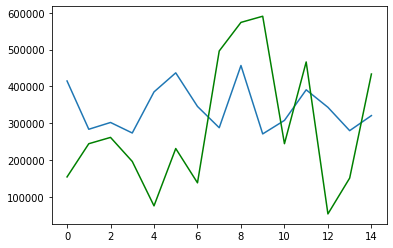

In [378]:
p23=RDF3.predict(xTest)
plt.plot(p23)
plt.plot(yTest, color="green")

In [427]:
#promedio del erro cuadrado
cem6=mean_squared_error(yTest, p23)
#raiz
rcem6=sqrt(cem6)
rcem6

189422.34629962317

In [382]:
arbol3 = RDF3.estimators_[6]
arbol3 # se crea el tercer arbol 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=192771779, splitter='best')

In [428]:
export_graphviz(arbol3, out_file = 'arbol3.dot', rounded = True, precision = 1)
(grafica, ) = pydot.graph_from_dot_file('arbol3.dot')
grafica.write_png('arbol3.png')
#se esporta en png

Se crea un vector con el promedio de los errores al cuadrado

In [443]:
vector_errores=[rcem1,rcem2,rcem3,rcem4,rcem5,rcem6]
menor_error=min(vector_errores)#se determina cual es menor
menor_error



169838.7148244125

In [447]:
#se crea un directorio con cada modelo
directorio={rcem1:"KNN", rcem2:"KNN2", rcem3:"KNN3", rcem4:"RDF",rcem5:"RDF2",rcem6:"RDF3"}
directorio[menor_error]

'KNN3'

Lo anterior muestra que el modelo que menos se equivoca en la predicción en promedio es el K Nearest Neighbor con 9 vecinos más cercanos